In [1]:
#Libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

In [2]:
#Own functions
import src.clean as cl

In [3]:
#Some configuration for matplotlib and seaborn to look pretty
%matplotlib inline
%config Inlinebackend.figure_format= 'retina'
sns.set_context("poster")
sns.set(rc={"figure.figsize": (18.,9.)})
sns.set_style("whitegrid")
SMALL_SIZE = 18
MEDIUM_SIZE = 20
BIGGER_SIZE = 30
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=SMALL_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [4]:
#Reading the clean Data Frame
df = pd.read_csv('Output/df_clean.csv')
df = cl.dropping(df,'Unnamed: 0')

In [5]:
df.sample()

,Country,Sex-ratio,Fertility,GDP per capita,Life expectancy,Meat consumption,Median age,Population growth,Suicide rate,Urbanization rate,Net Migration,Continent,HDI,Class
141,Nepal,0.96,1.9,3550.0,70.5,10.0,24.1,1.16,9.6,20.6,-15.1,Asia,0.574,In development


In [6]:
#Checking the amount of missing data over total. (77.9% complete)
completeness1=round((df.count().sum() - df.isna().sum().sum())/(df.shape[0]*df.shape[1]),3)
print(f'The gathered data is {100*completeness1}% complete')

The gathered data is 77.9% complete


In [7]:
# IMPORTANT: I have arbitrarily decided to drop countries which have less than 8 non-NaN values for a better analysis.
# This is due to missing over half of the given data.
df2=df.dropna(thresh=8)
df2.shape[0]

204

In [8]:
#We have dropped the small island Nations that didn't have an assigned Continent
df2['Continent'].isna().sum()

0

In [9]:
#Checking the amount of missing data over total. We have improved 13pp (90.9% complete)
completeness2=round((df2.count().sum() - df2.isna().sum().sum())/(df2.shape[0]*df2.shape[1]),3)
print(f'The gathered data is {100*completeness2}% complete')

The gathered data is 90.9% complete


In [10]:
unsung_heroes=[ country for country in list(df['Country']) if country not in list(df2['Country']) ]
unsung_heroes

['Anguilla',
 'Cayman Islands',
 'Cook Islands',
 'Faroe Islands',
 'French Guiana',
 'Gaza Strip',
 'Gibraltar',
 'Guadeloupe',
 'Guernsey',
 'Guinea-Bissau',
 'Jersey',
 'Martinique',
 'Mayotte',
 'Monaco',
 'Montserrat',
 'Nauru',
 'Niue',
 'Northern Mariana Islands',
 'Réunion',
 'Saint Barthelemy',
 'Saint Helena, Ascension and Tristan da Cunha',
 'Saint Martin',
 'Saint Pierre and Miquelon',
 'Sint Maarten',
 'Turks and Caicos Islands',
 'Virgin Islands',
 'Wallis and Futuna',
 'Western Sahara']

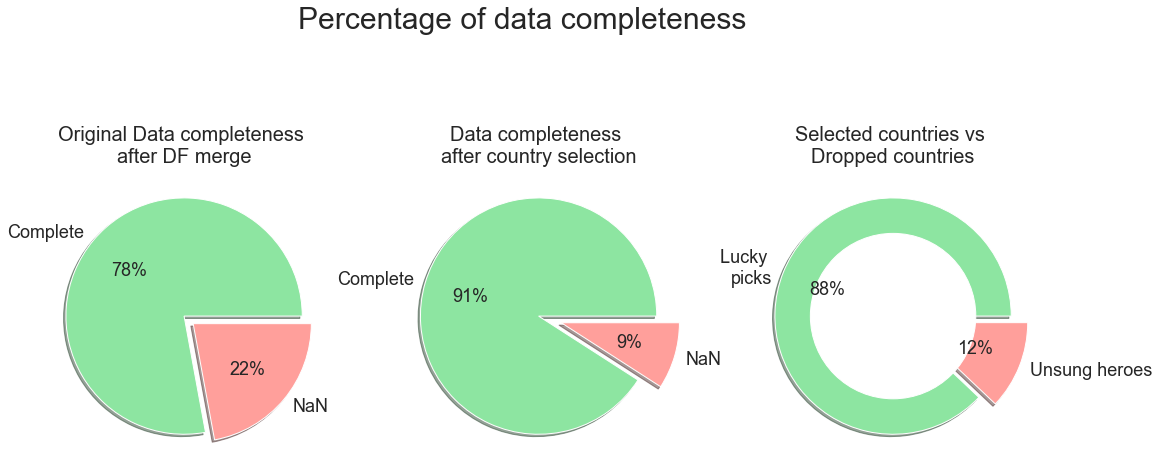

In [11]:
#Percentage of data completeness
# define data
data1 = [100*completeness1, 100*(1-completeness1)]
data2 = [100*completeness2, 100*(1-completeness2)]
data3 = [df2.shape[0]/df.shape[0]*100, (df.shape[0]-df2.shape[0])/df.shape[0]*100]

# define Seaborn color palette to use
labels = ['Complete', 'NaN']
labels3 = ['Lucky \npicks','Unsung heroes']
colors = sns.color_palette('pastel')[2:4]

# plot the figure
fig, axes = plt.subplots(1, 3, sharey=True)
fig.suptitle('Percentage of data completeness')
axes[0].pie(data1, labels = labels, colors = colors, autopct='%.0f%%', shadow=True, explode=(0, 0.1))
axes[0].set_title('Original Data completeness \nafter DF merge')

axes[1].pie(data2, labels = labels, colors = colors, autopct='%.0f%%', shadow=True, explode=(0, 0.2))
axes[1].set_title('Data completeness \nafter country selection')

axes[2].pie(data3, labels = labels3, colors = colors, autopct='%.0f%%', shadow=True, explode=(0, 0.15))
axes[2].set_title('Selected countries vs \nDropped countries')

#making it a donut
my_circle = plt.Circle( (0,0), 0.7, color='white')
p = plt.gcf()
p.gca().add_artist(my_circle)

plt.savefig("Output/images/Figure1.png")

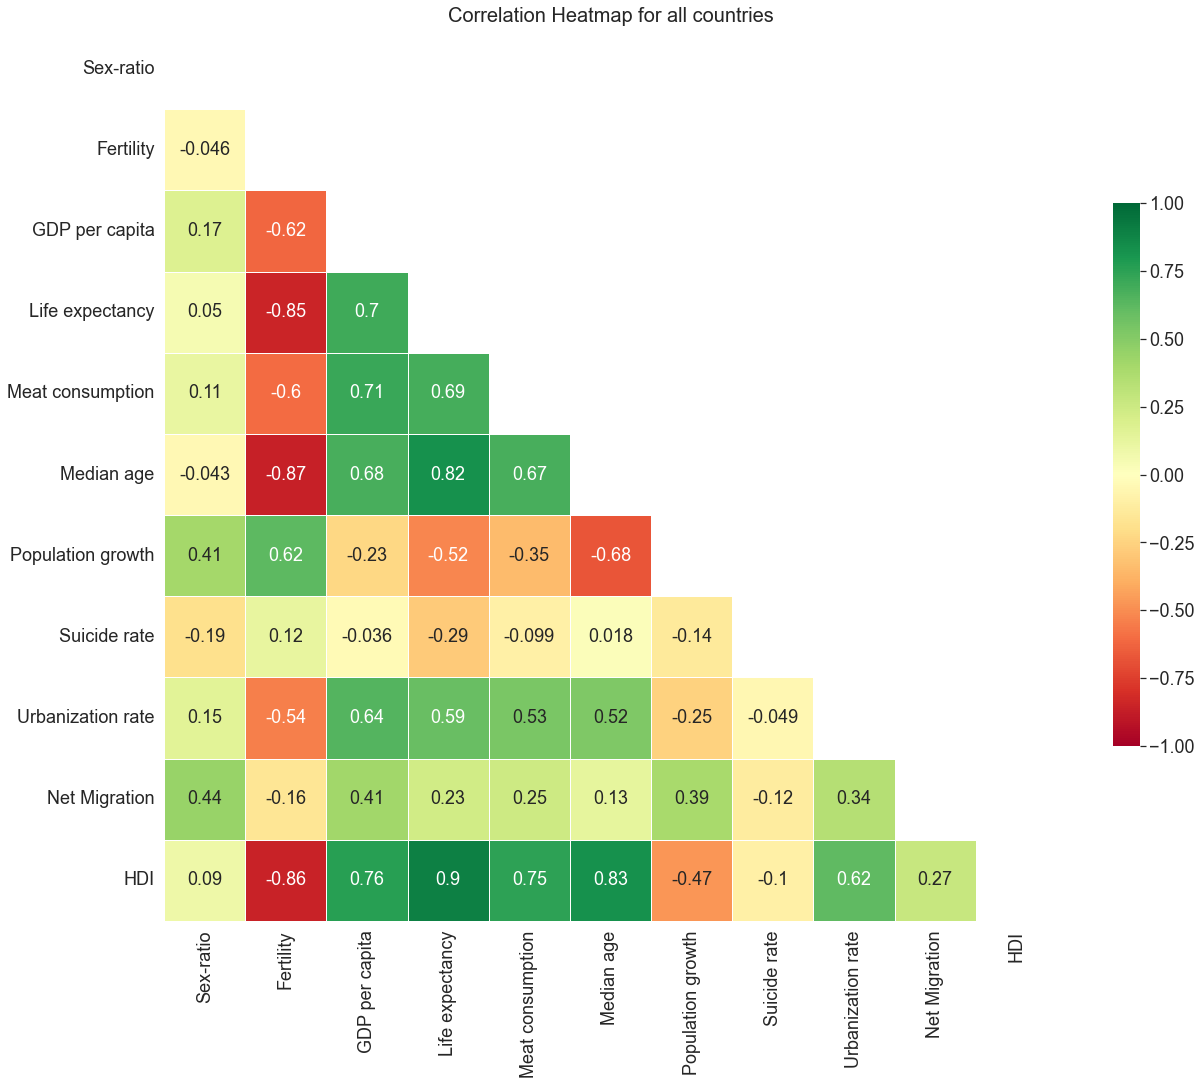

In [12]:
#Finding correlations within the df2
#Drop cathegorical columns
corr_df = cl.dropping(df2,'Country', 'Continent', 'Class')

#Set the variables
corrmat = corr_df.corr()        
mask = np.triu(np.ones_like(corrmat, dtype=bool)) 
top_corr_features = corrmat.index
plt.figure(figsize = (20, 20))
plt.title("Correlation Heatmap for all countries")

#Plot the heatmap
sns.heatmap(corrmat,  
            mask = mask,
            cmap='RdYlGn',
            square=True, 
            linewidth=0.5, 
            annot = True,
            vmax=1,
            vmin=-1,
            cbar_kws={"shrink": .5})

plt.savefig("Output/images/Figure2.png")

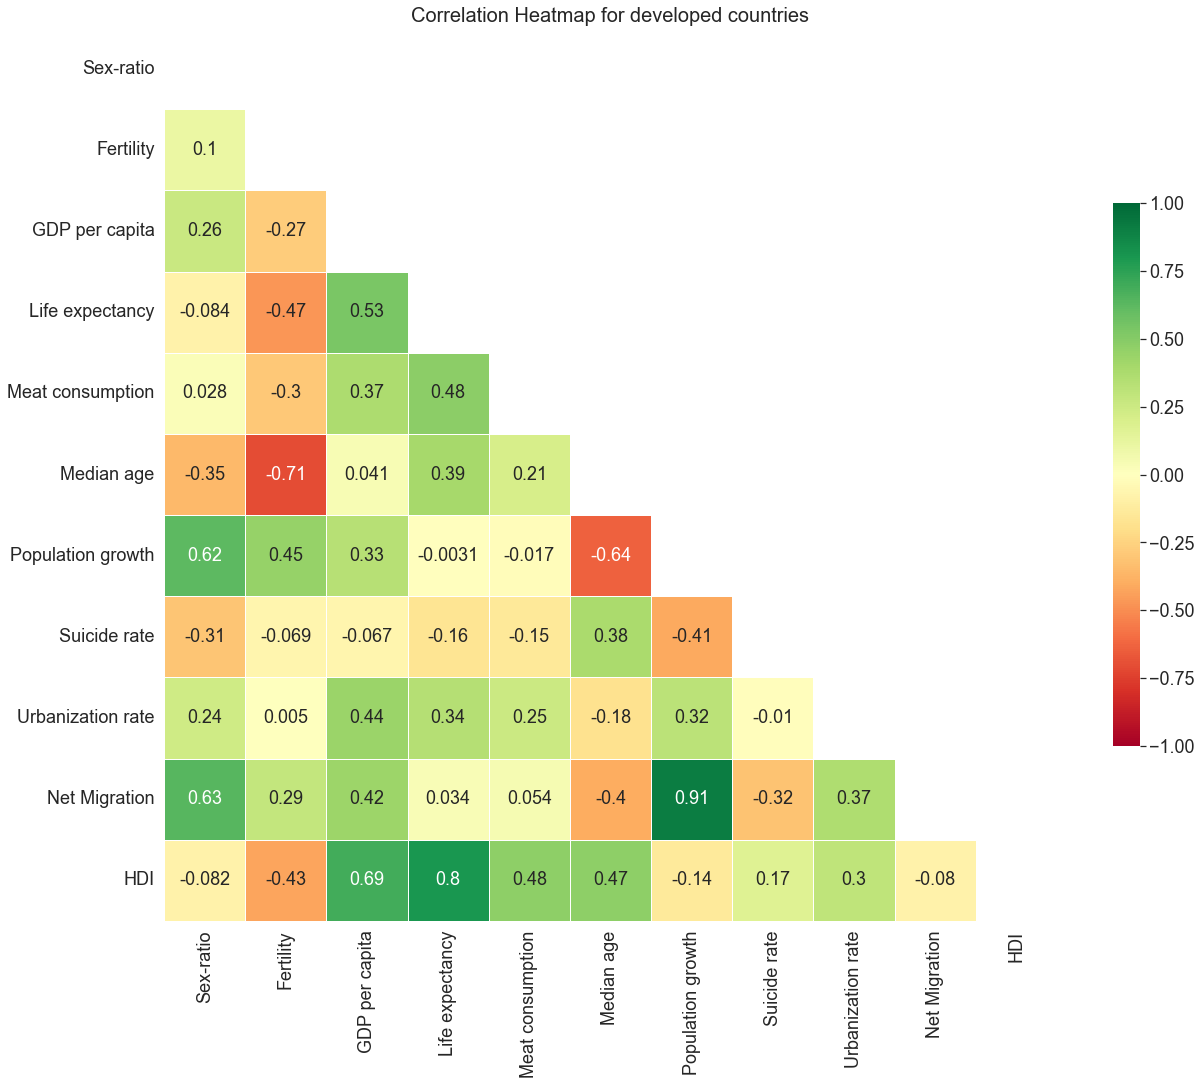

In [13]:
#Finding correlations within the Developed countries in df2
#Drop cathegorical columns
corr_df2=df2.drop(df2[df2.Class == 'In development'].index)
corr_df2 = cl.dropping(corr_df2,'Country', 'Continent', 'Class')

#Set the variables
corrmat = corr_df2.corr()                  
mask = np.triu(np.ones_like(corrmat, dtype=bool)) 
top_corr_features = corrmat.index
plt.figure(figsize = (20, 20))
plt.title("Correlation Heatmap for developed countries")

#Plot the heatmap
sns.heatmap(corrmat,  
            mask = mask,
            cmap='RdYlGn',
            square=True, 
            linewidth=0.5, 
            annot = True,
            vmax=1,
            vmin=-1,
            cbar_kws={"shrink": .5})

plt.savefig("Output/images/Figure3.png")

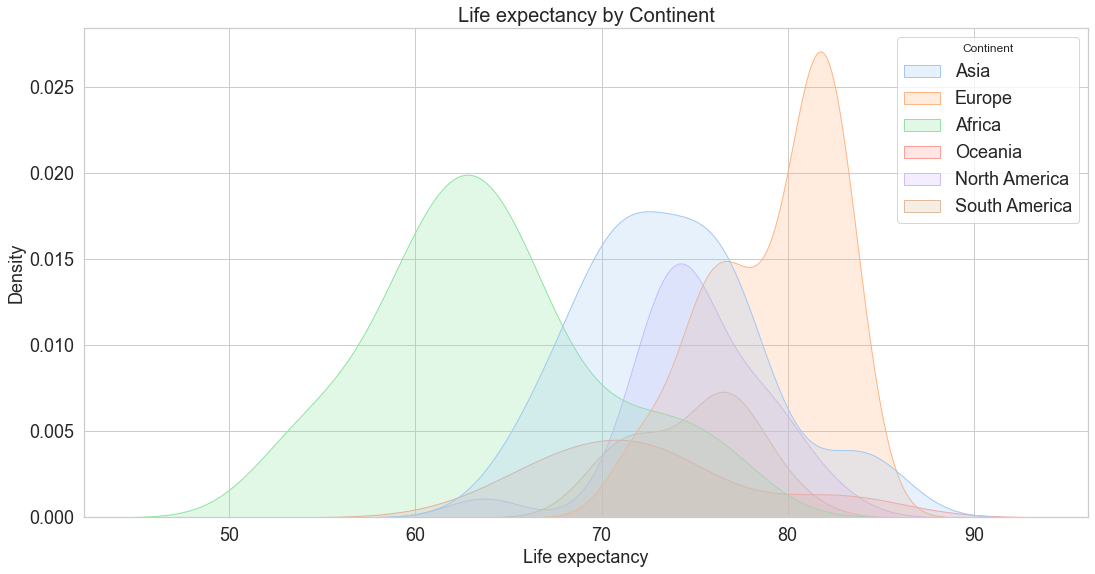

In [14]:
# Life expectancy by Continent
plt.figure(figsize = (18, 9))
plt.title("Life expectancy by Continent")
sns.kdeplot(x=df2['Life expectancy'], hue=df2.Continent, fill=True, palette= sns.color_palette('pastel')[0:6]);
plt.savefig("Output/images/Figure4.png")

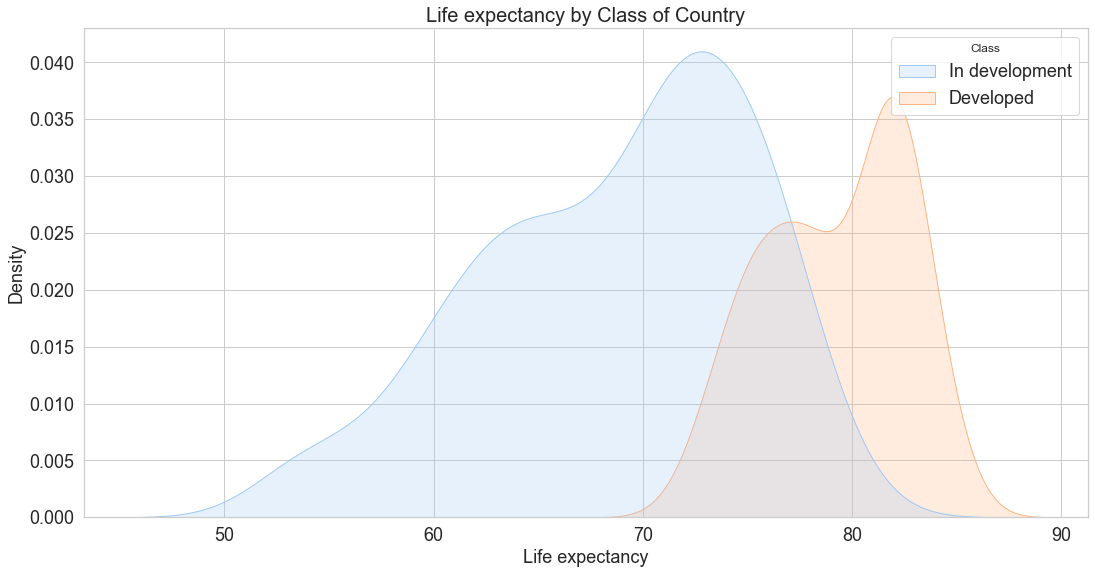

In [15]:
# Life expectancy by Class of Country
plt.figure(figsize = (18, 9))
plt.title("Life expectancy by Class of Country")
sns.kdeplot(x=df2['Life expectancy'], hue=df2.Class, fill=True, palette= sns.color_palette('pastel')[0:2]);
plt.savefig("Output/images/Figure5.png")

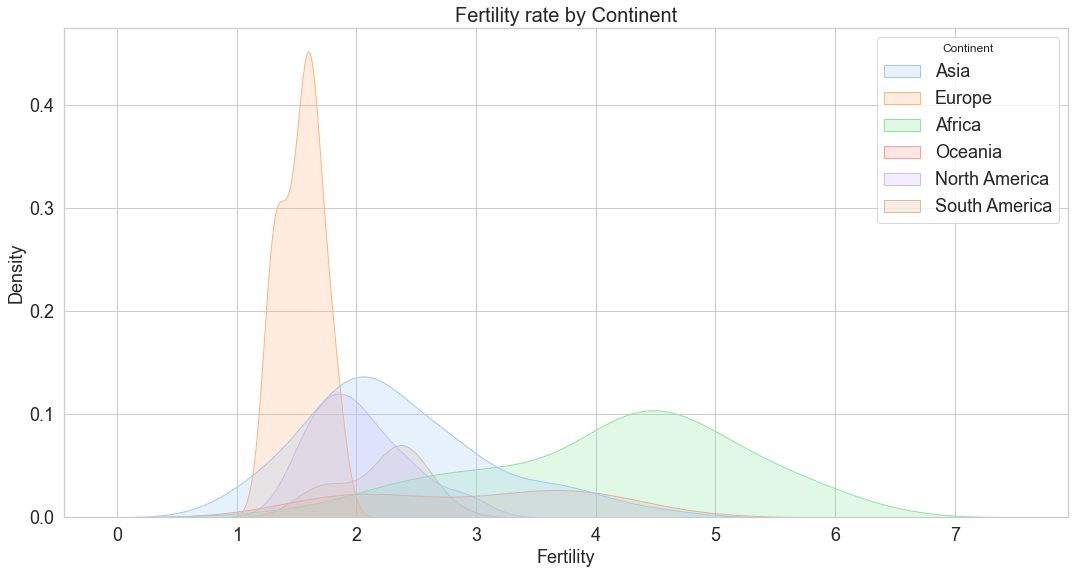

In [16]:
# Fertility rate by Continent
plt.figure(figsize = (18, 9))
plt.title("Fertility rate by Continent")
sns.kdeplot(x=df2['Fertility'], hue=df2.Continent, fill=True, palette= sns.color_palette('pastel')[0:6]);
plt.savefig("Output/images/Figure6.png")

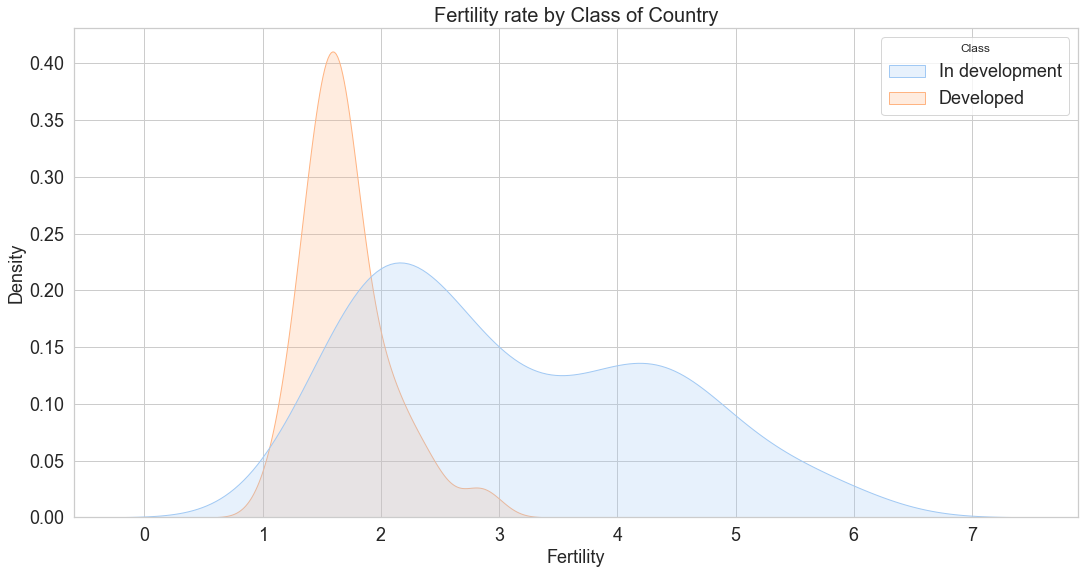

In [17]:
# Fertility rate by Class of Country
plt.figure(figsize = (18, 9))
plt.title("Fertility rate by Class of Country")
sns.kdeplot(x=df2['Fertility'], hue=df2.Class, fill=True, palette= sns.color_palette('pastel')[0:2]);
plt.savefig("Output/images/Figure7.png")

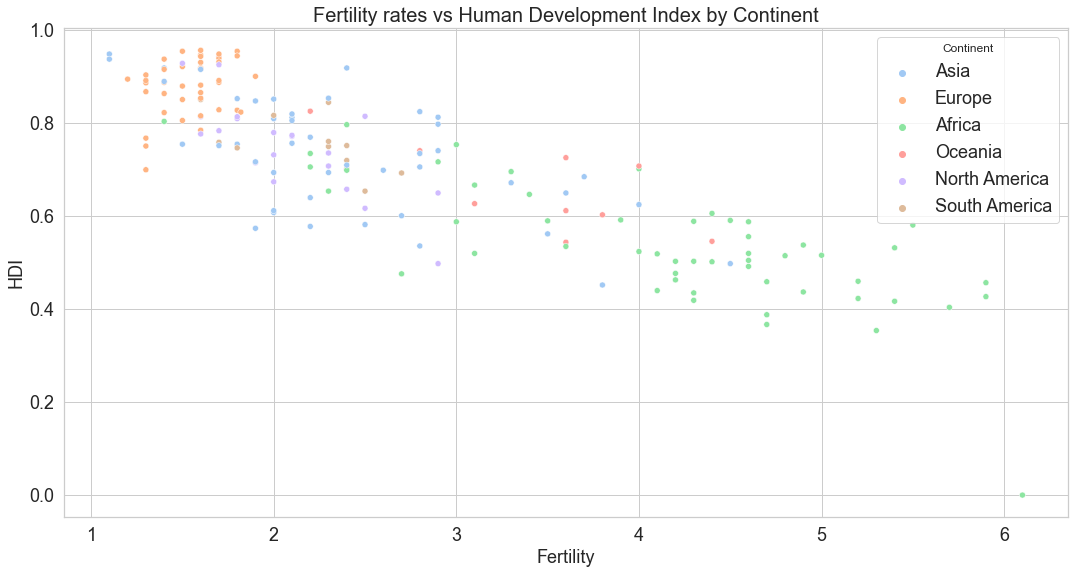

In [18]:
# Fertility rates vs Human Development Index by Continent
plt.figure(figsize = (18, 9))
plt.title("Fertility rates vs Human Development Index by Continent")
sns.scatterplot(x=df2['Fertility'], y=df2['HDI'], hue=df2.Continent, data=df2, palette = sns.color_palette('pastel')[:6]);
plt.savefig("Output/images/Figure8.png")

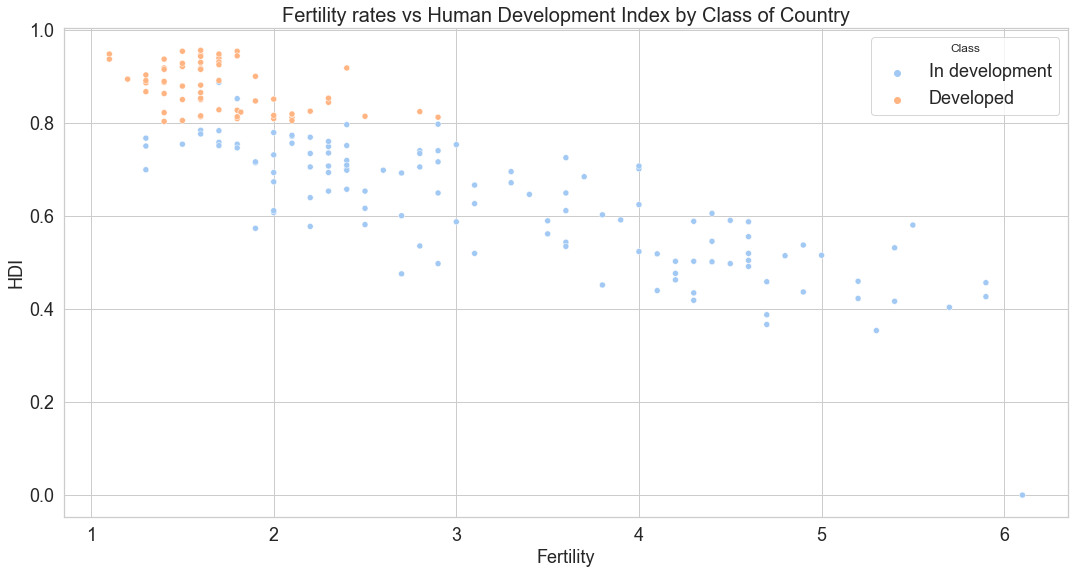

In [19]:
# Fertility rates vs Human Development Index by Class of Country
plt.figure(figsize = (18, 9))
plt.title("Fertility rates vs Human Development Index by Class of Country")
sns.scatterplot(x=df2['Fertility'], y=df2['HDI'],ci=None, hue=df2.Class, data=df2, palette = sns.color_palette('pastel')[:2]);
plt.savefig("Output/images/Figure9.png")

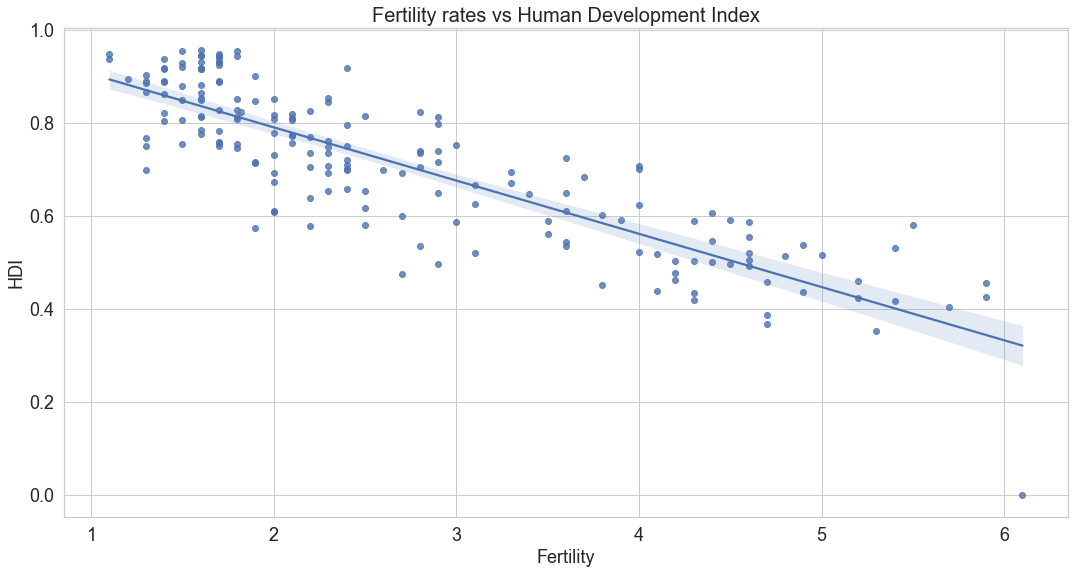

In [20]:
# Fertility rates vs Human Development Index
plt.figure(figsize = (18, 9))
plt.title("Fertility rates vs Human Development Index")
sns.regplot(x=df2['Fertility'], y=df2['HDI'])
plt.savefig("Output/images/Figure10.png")


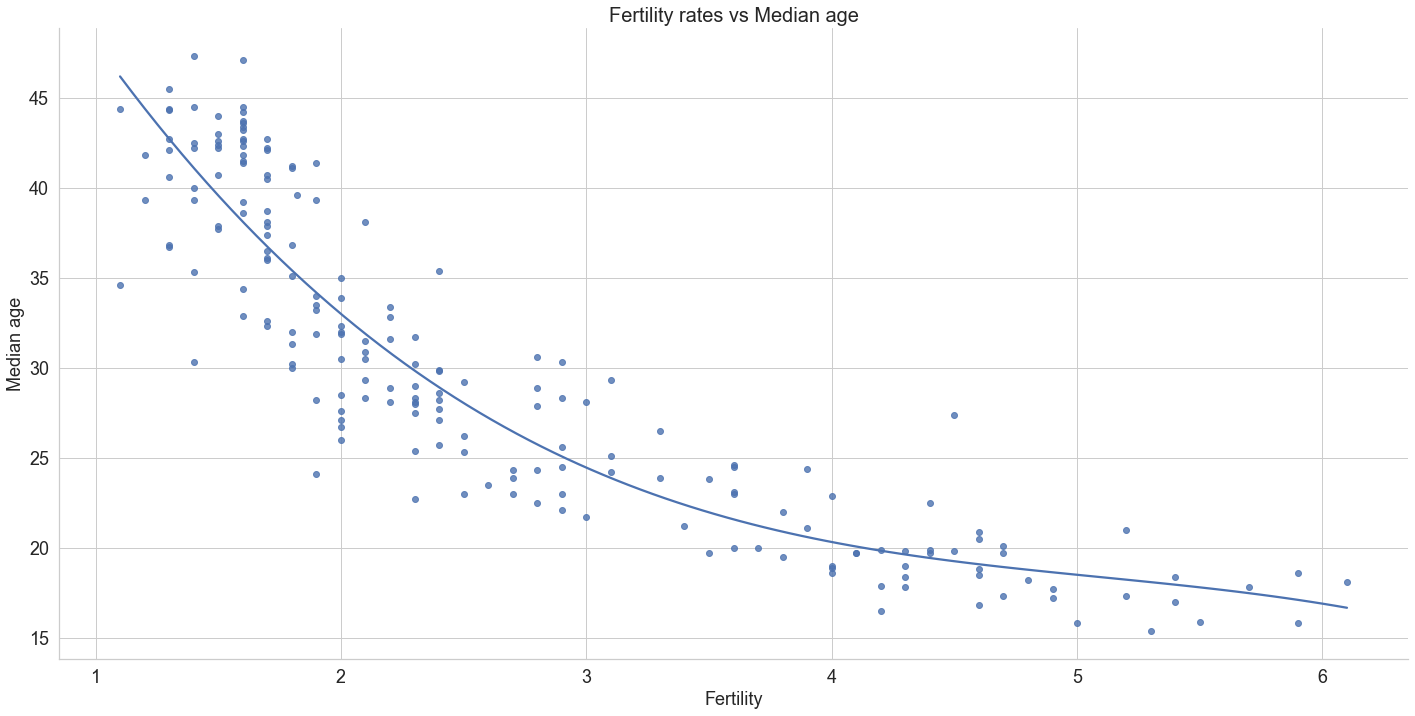

In [21]:
# Fertility rates vs Median age
sns.lmplot(x='Fertility', y='Median age', data=df2, order=3, ci=None, height=10, aspect=2);
ax = plt.gca()
ax.set_title("Fertility rates vs Median age")
plt.savefig("Output/images/Figure11.png")

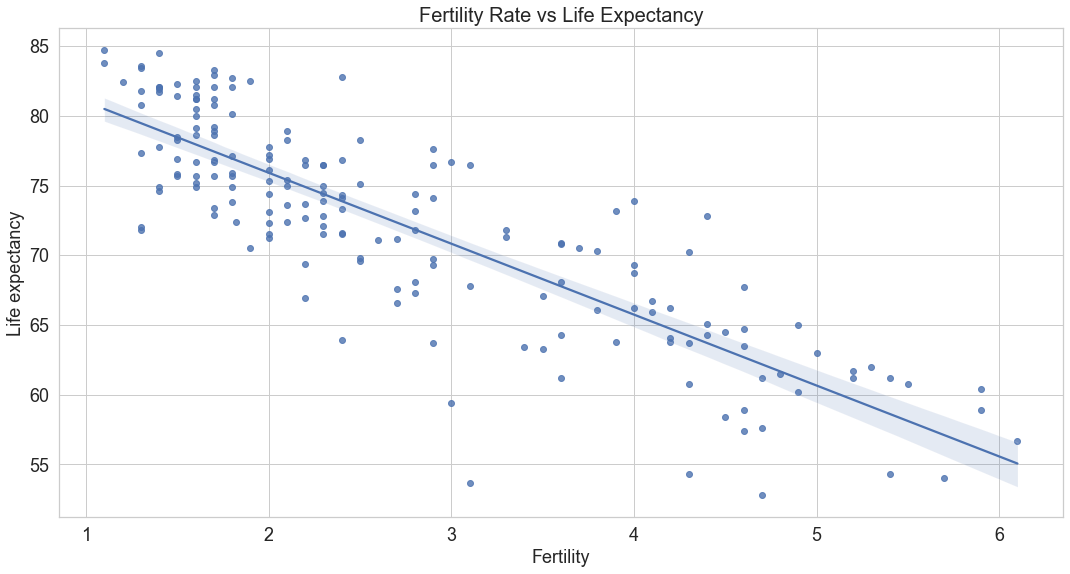

In [22]:
# Fertility Rate vs Life Expectancy
plt.figure(figsize = (18, 9))
plt.title("Fertility Rate vs Life Expectancy")
sns.regplot(x=df2['Fertility'], y=df2['Life expectancy'])
plt.savefig("Output/images/Figure12.png")

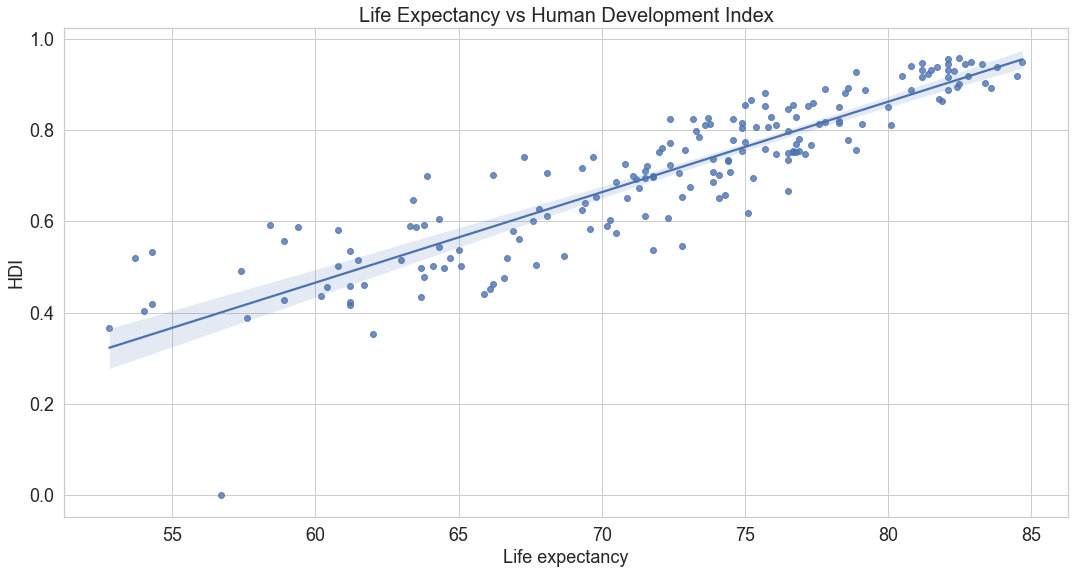

In [23]:
# Life Expectancy vs Human Development Index
plt.figure(figsize = (18, 9))
plt.title("Life Expectancy vs Human Development Index")
sns.regplot(x=df2['Life expectancy'], y=df2['HDI'])
plt.savefig("Output/images/Figure13.png")

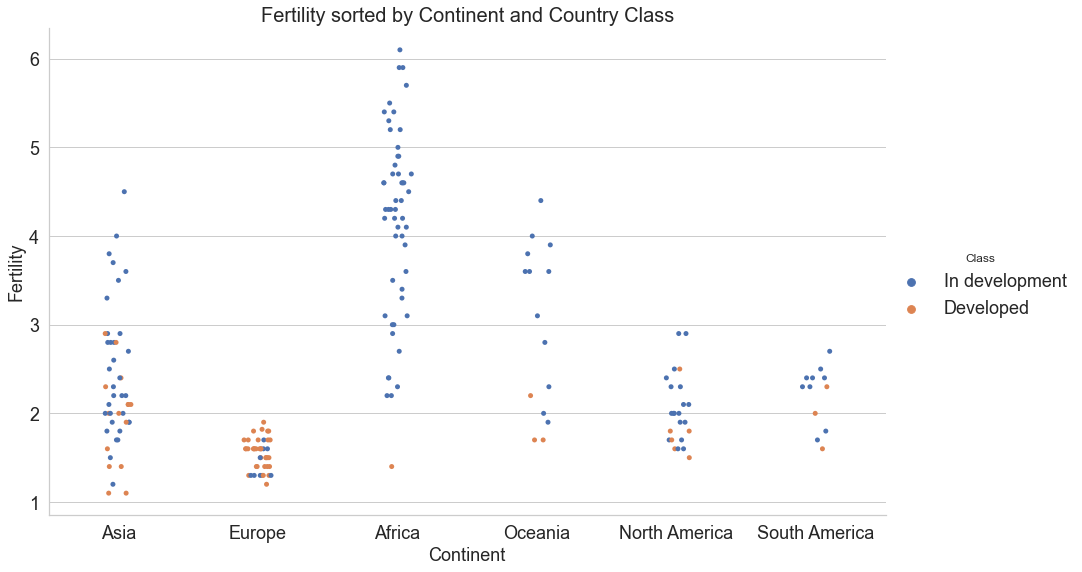

In [24]:
sns.catplot(data=df2, x="Continent", y="Fertility",hue='Class', height=8, aspect=1.6);
ax = plt.gca()
ax.set_title("Fertility sorted by Continent and Country Class")
plt.savefig("Output/images/Figure14.png")

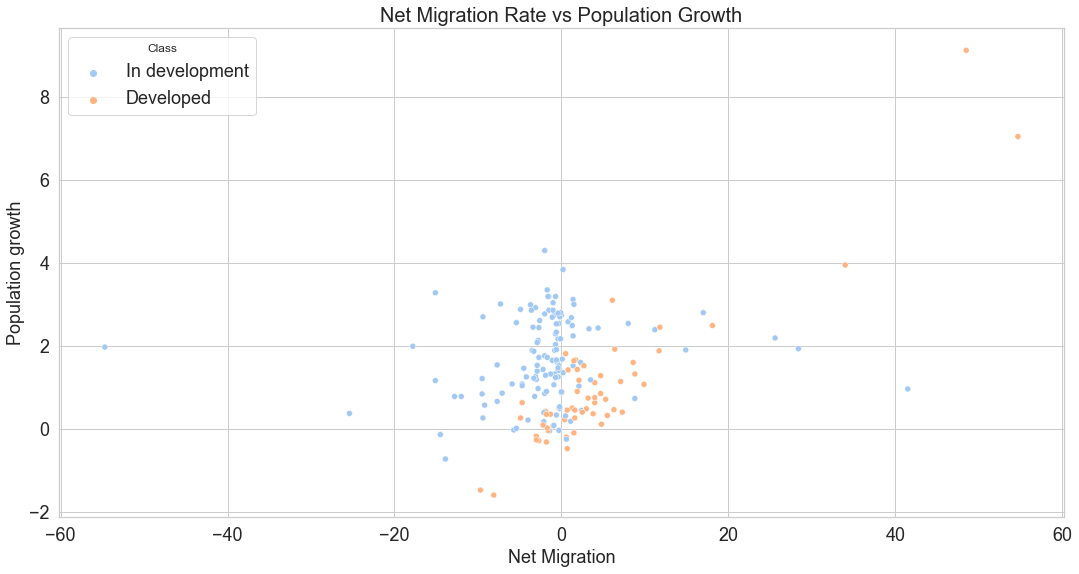

In [25]:
# Net Migration Rate vs Population Growth by Class
plt.figure(figsize = (18, 9))
plt.title("Net Migration Rate vs Population Growth")
sns.scatterplot(x=df2['Net Migration'], y=df2['Population growth'],ci=None, hue=df2.Class, data=df2, palette = sns.color_palette('pastel')[:2]);
plt.savefig("Output/images/FigureX.png")

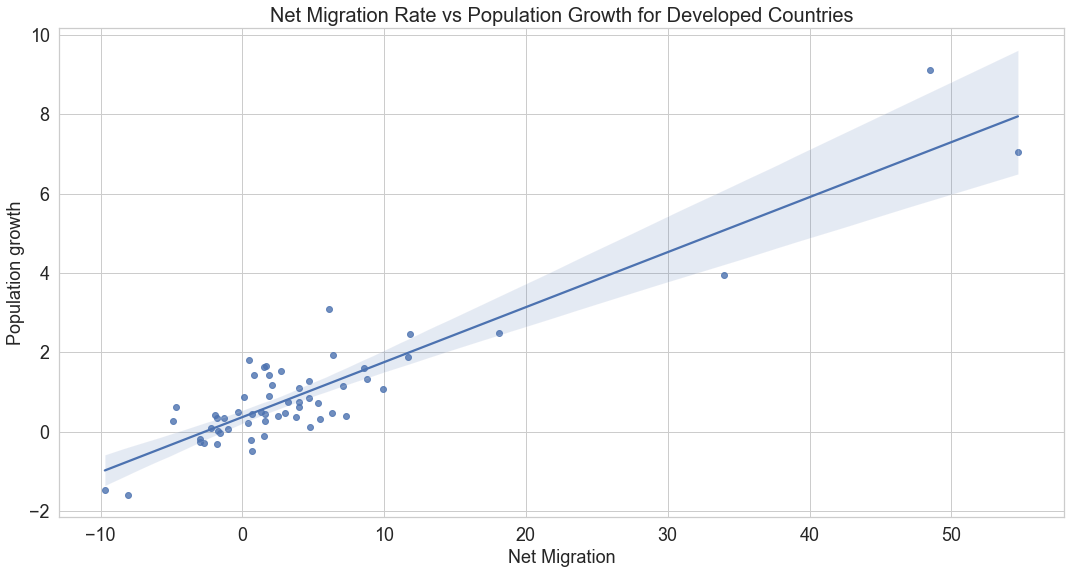

In [26]:
# Net Migration Rate vs Population Growth for Developed Countries
plt.figure(figsize = (18, 9))
x=df2.drop(df2[df2.Class == 'In development'].index)
plt.title("Net Migration Rate vs Population Growth for Developed Countries")
sns.regplot(x=x['Net Migration'], y=x['Population growth'])
plt.savefig("Output/images/FigureXXX.png")

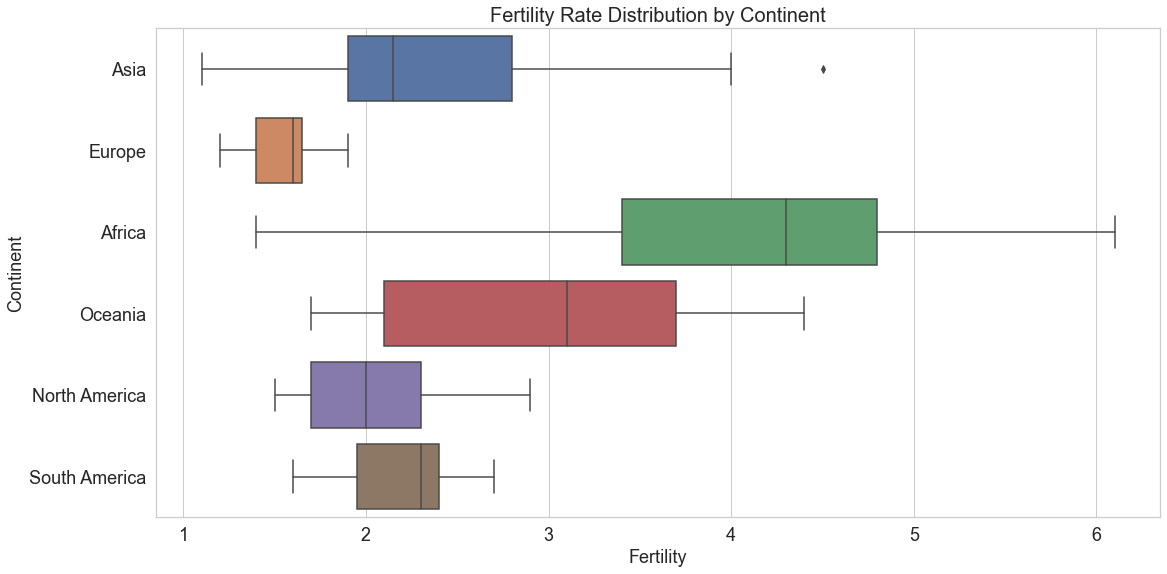

In [27]:
# Fertility Rate by Continent
plt.figure(figsize = (18, 9))
plt.title("Fertility Rate Distribution by Continent")
sns.boxplot(x='Fertility', y='Continent', data=df2)
plt.savefig("Output/images/Figure15.png")

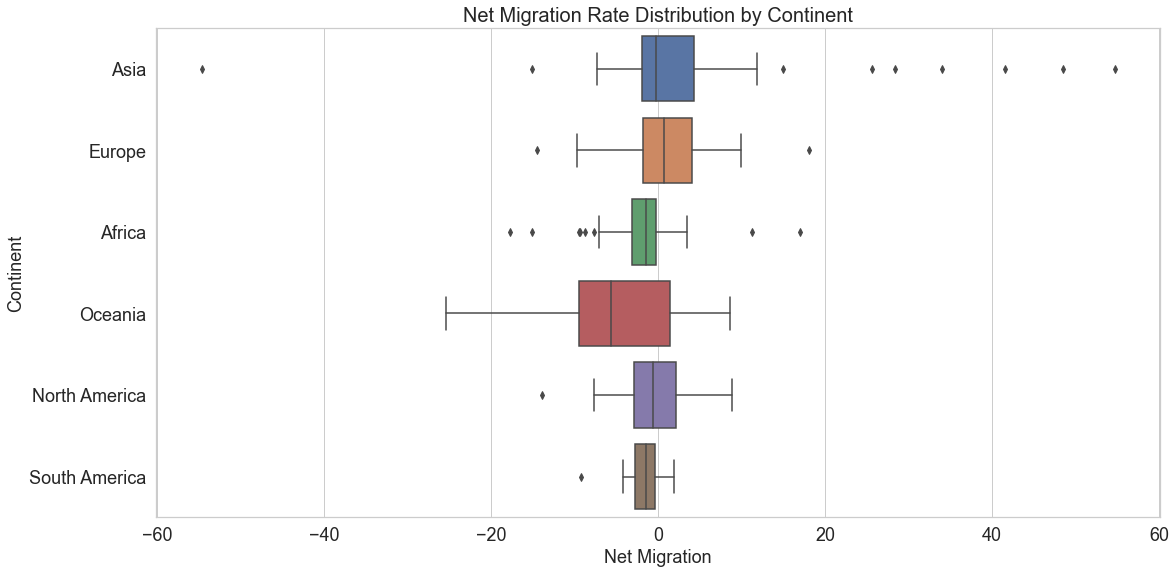

In [28]:
# Net Migration Rate by Continent
plt.figure(figsize = (18, 9))
plt.title("Net Migration Rate Distribution by Continent")
sns.boxplot(x='Net Migration', y='Continent', data=df2)
plt.savefig("Output/images/Figure16.png")

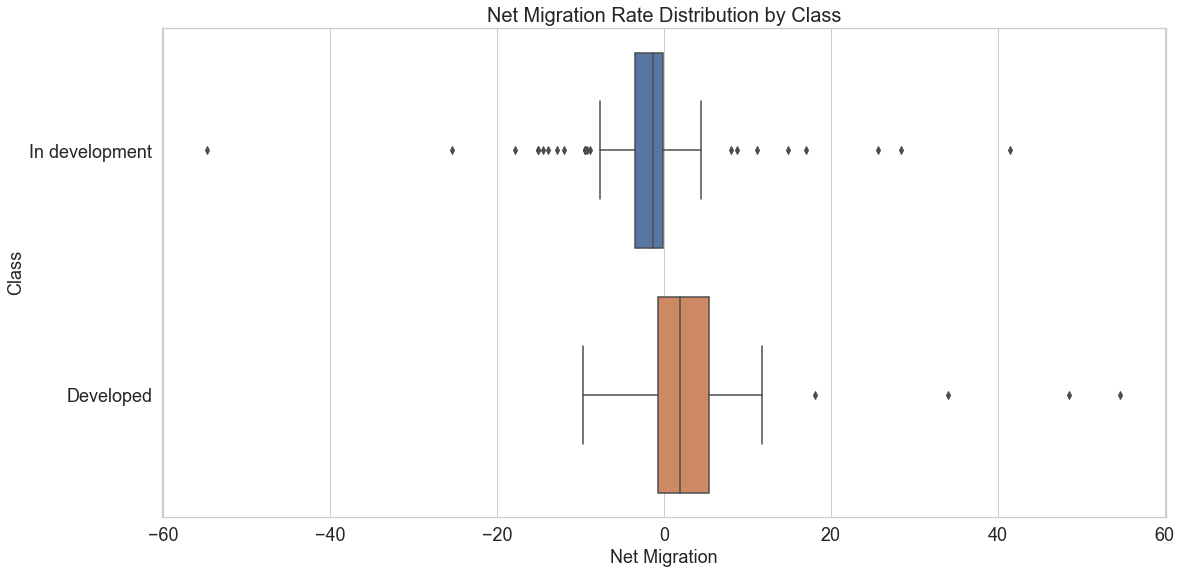

In [29]:
# Net Migration Rate by Class
plt.figure(figsize = (18, 9))
plt.title("Net Migration Rate Distribution by Class")
sns.boxplot(x='Net Migration', y='Class', data=df2)
plt.savefig("Output/images/Figure17.png")